# Grouping data

A single pandas DataFrame can often be decomposed into smaller subsets of data that need to be visualized.  <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> contains multiple grouping levels to expose unique subsets of data:
* <font style="font-family:'Courier New'">legend</font>: color lines and markers according to unique values in a DataFrame column
* <font style="font-family:'Courier New'">groups</font>: 
    * for xy plots: separates unique subsets so plot lines are not continuously looped back to the origin (useful for replicates of similar data)
    * for boxplots: groups boxes by unique values in one or more DataFrame columns
* <font style="font-family:'Courier New'">row | column</font>: makes a grid of subplots for each unique value of the DataFrame column names specified for these keyword arguments within a single figure
* <font style="font-family:'Courier New'">wrap</font>: similar to row and column grouping, wrap makes a grid of subplots for each unique value of the DataFrame column names specified for these keyword arguments within a single figure
* <font style="font-family:'Courier New'">figure</font>:  makes a unique figure for each unique value of a DataFrame column

It is also possible to filter data inline sets via the keyword <font style="font-family:'Courier New'">filter</font>.  

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path = [r'C:\GitHub\fivecentplots'] + sys.path
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace
fcp

<module 'fivecentplots' from 'C:\\GitHub\\fivecentplots\\fivecentplots\\__init__.py'>

### Sample data

In [3]:
df1 = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data.csv'))
df2 = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))

## legend

### Using <font style="font-family:'Courier New'">filter</font>

In this data set, we have repeats of the same current vs. voltage measurement at three different "Die" locations.  By setting the <font style="font-family:'Courier New'">legend</font> keyword equal to the name of the DataFrame column containing the "Die" value, we can distinctly visualize the measurement for each site.

I [A] vs Voltage.png


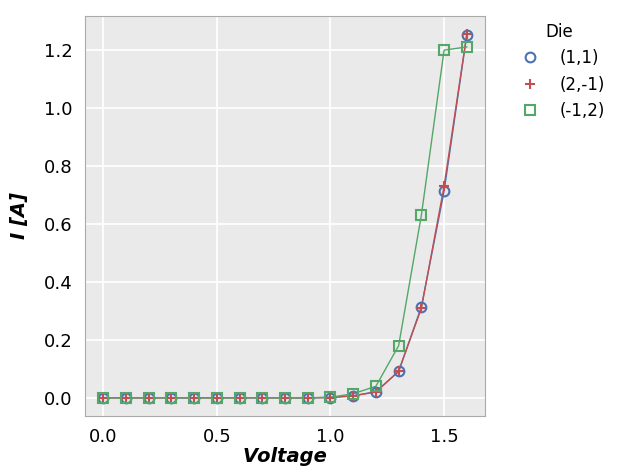

In [15]:
fcp.plot(df=df1, x='Voltage', y='I [A]', legend='Die', \
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Pre-filtering using boolean masks

Notice the DataFrame supplied to the <font style="font-family:'Courier New'">plot</font> function above used the <font style="font-family:'Courier New'">filter</font> keyword to help subset the data. We can also pre-filter via boolean operations applied directly to the main DataFrame.

I [A] vs Voltage.png


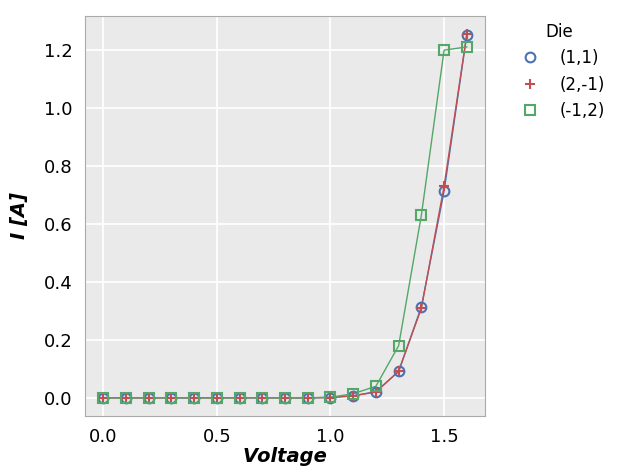

Wall time: 677 ms


In [16]:
sub = df1[(df1.Substrate=='Si') &
          (df1['Target Wavelength']==450) &
          (df1['Boost Level']==0.2) &
          (df1['Temperature [C]']==25).copy()
         ]
fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die')

### Multiple legend columns

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> also supports legending by multiple DataFrame columns.  When a list of column names is passed to the <font style="font-family:'Courier New'">legend </font> keyword, a new column is created that concatenates each column in the list.  This new column is used for legending.

I [A] vs Voltage.png


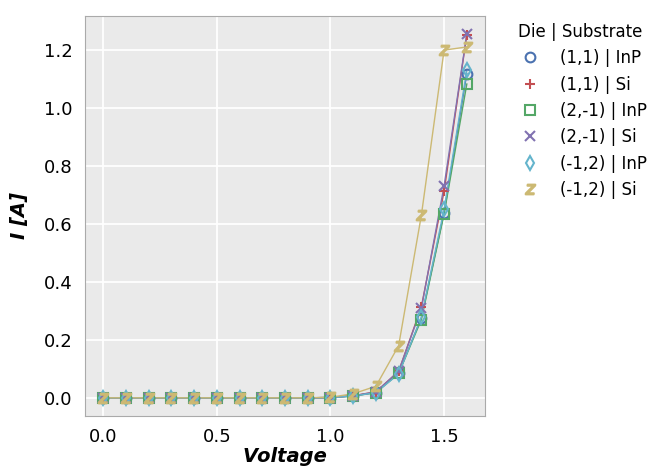

In [25]:
fcp.plot(df=df1, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

## groups

### xy plots

Some data sets contain multiple sets of similar data.  Consider the following example where we  plot all the data together and connect the points with lines.  Notice how the line loops from the end of the data back to the begining for each "group" of the data.  This occurs because we have provided no information about how to segment the data set.

I [A] vs Voltage.png


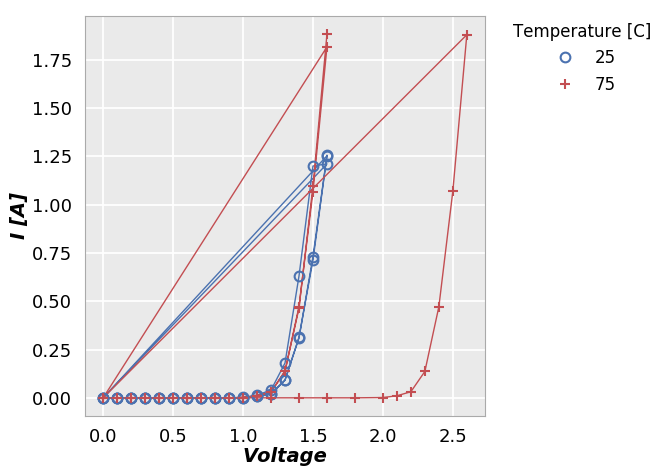

Wall time: 1 s


In [26]:
fcp.plot(df=df1, x='Voltage', y='I [A]', legend='Temperature [C]', \
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

To handle cases like this, we can add the keyword "groups" and specify another DataFrame column name that indicates how the data are grouped (in this case by "Die").  Now we get distinct lines for each instance of the measurement data.

I [A] vs Voltage by Die.png


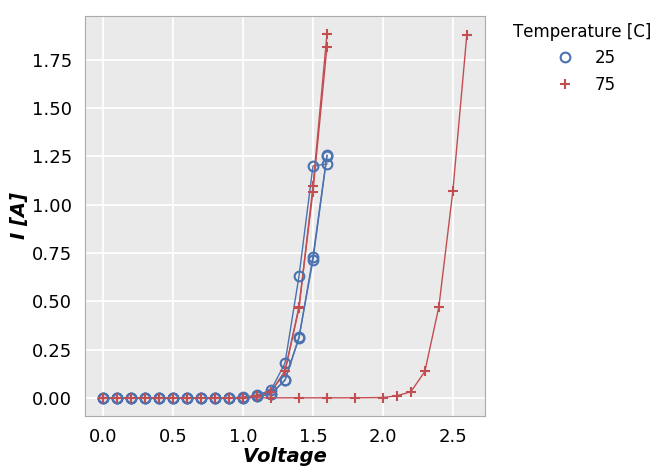

Wall time: 816 ms


In [27]:
fcp.plot(df=df1, x='Voltage', y='I [A]', groups='Die', legend='Temperature [C]', \
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

### boxplots

## row | col subplots

To see a larger subset of the main DataFrame, we can make a grid of subplots based on DataFrame columns other than the primary x and y columns we are using.  In this case, we remove the "Temperature [C]" and "Boost Level" columns from the <font style="font-family:'Courier New'">filter</font> keyword and add them to the <font style="font-family:'Courier New'">row</font> and <font style="font-family:'Courier New'">column</font> commands, respectively.

Voltage vs I [A] by Temperature [C] by Boost Level.png


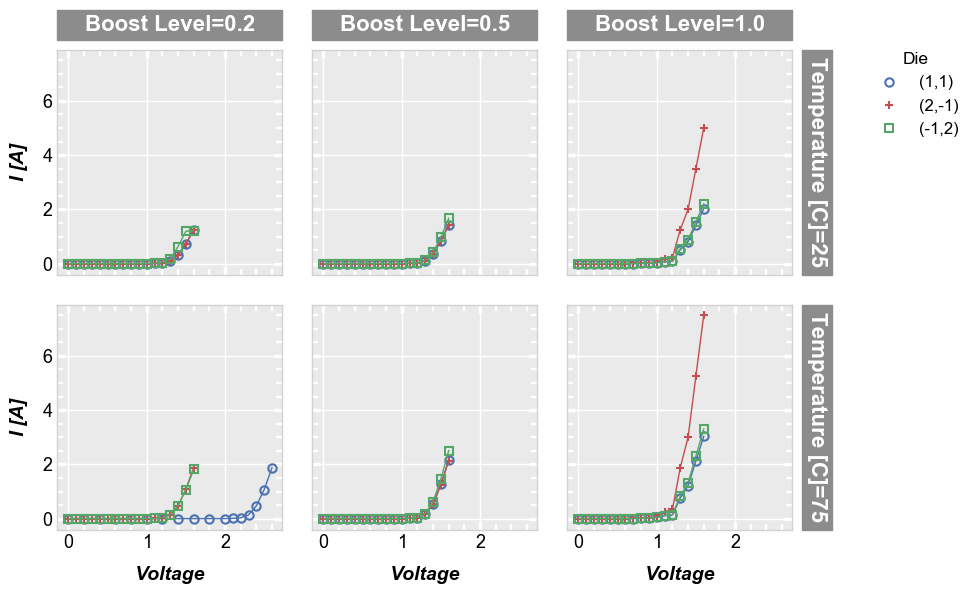

Wall time: 3.56 s


In [8]:
fcp.plot(df=df1, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450')

## wrap subplots

Alternatively, we can combine the unique row and column values into a single header by passing the "Temperature [C]" and "Boost Level" column names as a list to the <font style="font-family:'Courier New'">wrap</font> keyword.

Voltage vs I [A] by Temperature [C] + Boost Level.png


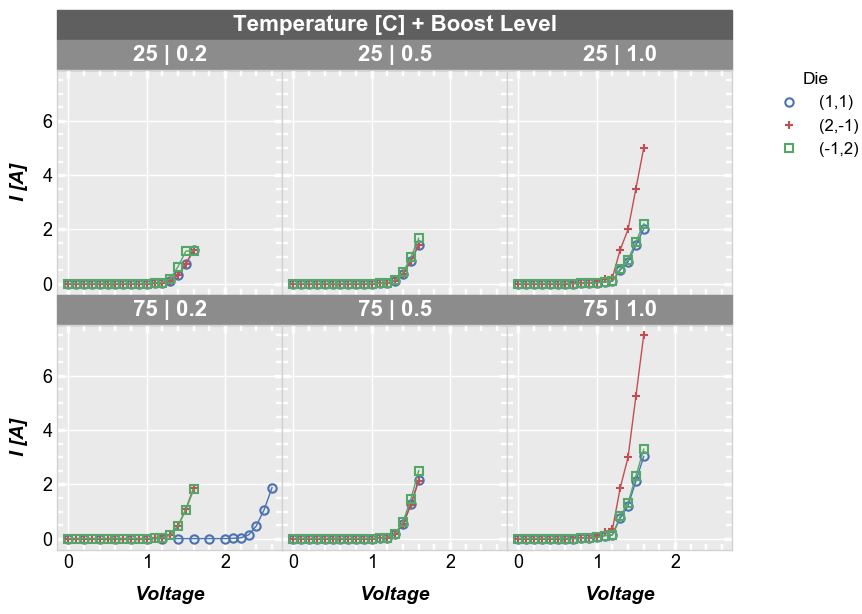

Wall time: 3.33 s


In [9]:
fcp.plot(df=df1, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'], \
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450')

## figure plots

To add another dimension of grouping, <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> supports grouping by figure.  In this case, a separate figure (i.e., a separate png) is created for each unique value in the DataFrame column(s) listed in the <font style="font-family:'Courier New'">fig_groups </font> keyword.  

Voltage vs I [A]Die by Temperature [C] + Boost Level where Die=(-1,2).png


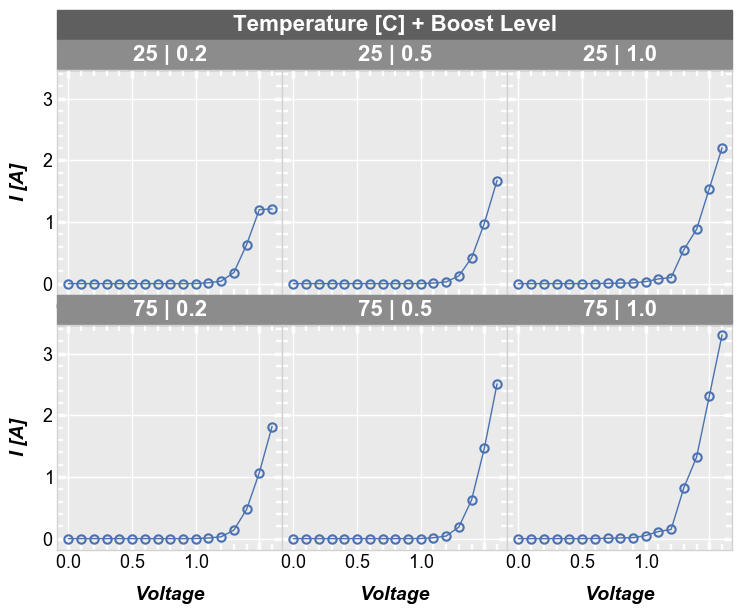

Voltage vs I [A]Die by Temperature [C] + Boost Level where Die=(1,1).png


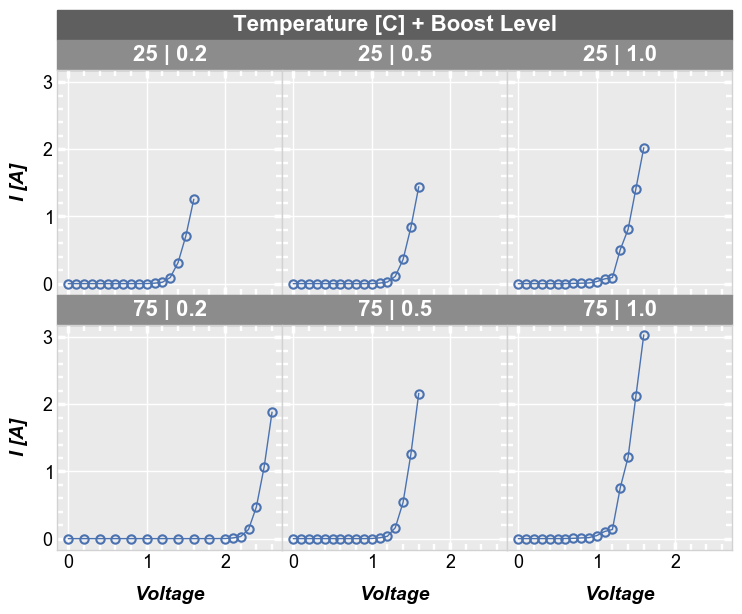

Voltage vs I [A]Die by Temperature [C] + Boost Level where Die=(2,-1).png


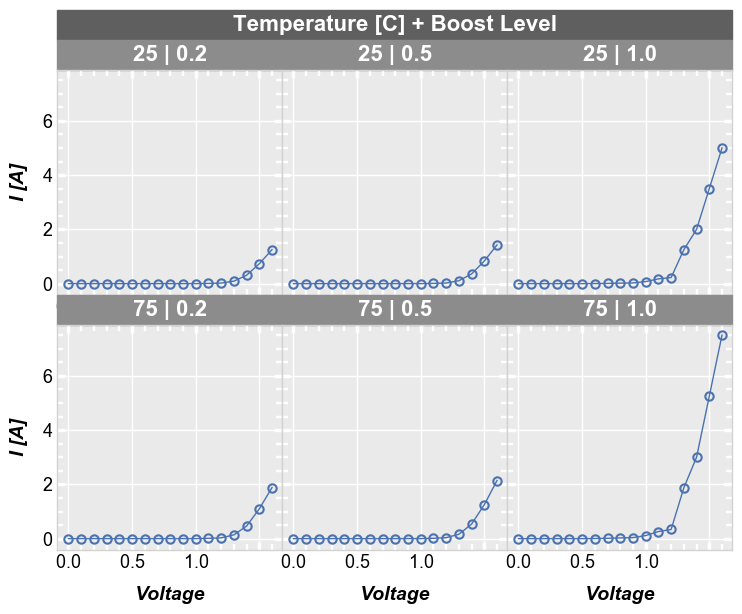

Wall time: 10.4 s


In [10]:
fcp.plot(df=df1, x='Voltage', y='I [A]', fig_groups='Die', wrap=['Temperature [C]', 'Boost Level'], \
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450')